In [2]:
import geopandas as gpd
gdf = gpd.read_file('data.geojson')

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Mengonversi data geospasial menjadi fitur numerik (misalnya koordinat, zona, dll.)
X = gdf[['longitude', 'latitude']] # Fitur
y = gdf['species'] # Label kelas

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prediksi hasil pada data test
y_pred = model.predict(X_test)

# Evaluasi model
print(classification_report(y_test, y_pred))

                                  precision    recall  f1-score   support

Dryopteris filix-mas (L.) Schott       0.62      0.34      0.44        98
       Roemeria hybrida (L.) DC.       0.00      0.00      0.00         5
                Taxus baccata L.       0.52      0.78      0.63        97

                        accuracy                           0.55       200
                       macro avg       0.38      0.37      0.35       200
                    weighted avg       0.56      0.55      0.52       200



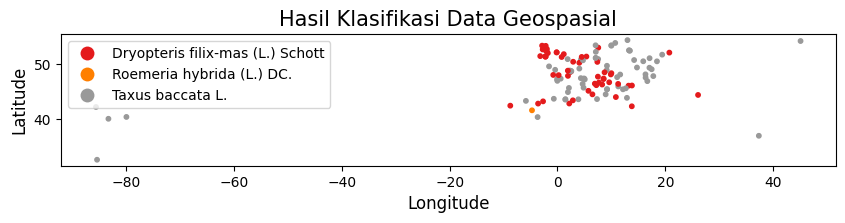

In [4]:
import matplotlib.pyplot as plt

# Menambahkan hasil prediksi sebagai kolom baru di GeoDataFrame
gdf.loc[X_test.index, 'prediction'] = y_pred

# Visualisasi hasil klasifikasi pada peta
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='prediction', ax=ax, legend=True, cmap='Set1', markersize=10)
ax.set_title("Hasil Klasifikasi Data Geospasial", fontsize=15)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
plt.show()
